In [1]:
# 리그 / 팀별로 특성이 차이가 분명히 있었음!!! (앞에서 증명됨)
# 변수를 축소하여 모델링을 해보자

# 0. 리그 / 팀별 특성 존재 유무 탐색 ==> 증명됨!
# 1. 주성분분석 ==> 변수 축소 (여기까지는 가능할 것으로 보임)
# 2. Artificial Neural Network로 모델링 진행 (성능개선 필요)

In [2]:
import numpy as np
from sklearn.decomposition import PCA

In [3]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

In [4]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(copy=True, n_components=1, whiten=False)

In [5]:
print(pca.explained_variance_ratio_)

[ 0.99244289]


In [6]:
pca.components_

array([[ 0.83849224,  0.54491354]])

In [7]:
pca.transform(X)

array([[-1.38340578],
       [-2.22189802],
       [-3.6053038 ],
       [ 1.38340578],
       [ 2.22189802],
       [ 3.6053038 ]])

In [8]:
w, V = np.linalg.eig(pca.get_covariance())

In [9]:
w

array([ 6.61628593,  0.05038073])

In [10]:
V

array([[ 0.83849224, -0.54491354],
       [ 0.54491354,  0.83849224]])

In [11]:
V.T.dot(X.T).T

array([[-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385],
       [ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385]])

In [12]:
import pandas as pd

In [13]:
merged_player = pd.read_csv("./merged_player.csv")

In [14]:
merged_player = merged_player.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [15]:
merged_player.columns

Index(['age', 'asists', 'avgp', 'aw', 'blocks', 'clear', 'crosses', 'disp',
       'drb', 'flag', 'fouled', 'fouls', 'full_time', 'goals', 'half_time',
       'inter', 'keyp', 'league', 'longb', 'mins', 'motm', 'name', 'off',
       'offsides', 'owng', 'player_number', 'position', 'ps_x', 'ps_y',
       'rating', 'red', 'spg', 'tackles', 'tall', 'team_name', 'thrb',
       'unstch', 'weight', 'yel'],
      dtype='object')

In [16]:
merged_player0 = merged_player.drop(['flag', 'player_number', 'team_name', 'name'], axis=1)

In [17]:
merged_player0 = merged_player0.drop(['rating', 'full_time', 'motm', 'half_time'], axis=1)

In [18]:
merged_player0["position"] = merged_player0["position"].apply(lambda x: x.strip())

forward_pos = []
mid_pos = []
defense_pos = []

for position in merged_player0["position"].unique():
    
    
    if position.find("F") == 0:
        forward_pos.append(position)
        
    if position.find("A") == 0:
        forward_pos.append(position)
        
    if position.find("M") == 0:
        mid_pos.append(position)
        
    if position.find("D") == 0:
        defense_pos.append(position)
        
forward_df = pd.DataFrame(columns=merged_player0.columns)

for position in forward_pos:
    f_df = merged_player[merged_player0["position"] == position]
    forward_df = pd.concat([forward_df, f_df])
    
mid_df = pd.DataFrame(columns=merged_player0.columns)

for position in mid_pos:
    m_df = merged_player[merged_player0["position"] == position]
    mid_df = pd.concat([mid_df, m_df])
    
defense_df = pd.DataFrame(columns=merged_player0.columns)

for position in defense_pos:
    d_df = merged_player[merged_player0["position"] == position]
    defense_df = pd.concat([defense_df, d_df])

In [19]:
forward_df.to_csv("./forward_df.csv")

In [20]:
forward_df0 = forward_df.drop(['flag', 'full_time', 'half_time', 'mins', 'motm', 'name', 'player_number', 'position', 'ps_y', 'rating', 'team_name'], axis=1)

In [21]:
forward_df0.columns

Index(['age', 'asists', 'avgp', 'aw', 'blocks', 'clear', 'crosses', 'disp',
       'drb', 'fouled', 'fouls', 'goals', 'inter', 'keyp', 'league', 'longb',
       'off', 'offsides', 'owng', 'ps_x', 'red', 'spg', 'tackles', 'tall',
       'thrb', 'unstch', 'weight', 'yel'],
      dtype='object')

In [22]:
forward_df0 = forward_df0.drop(['league'], axis=1)

In [23]:
forward_df0 = forward_df0.drop(['off', 'offsides'], axis=1)

In [24]:
forward_df0 = forward_df0.fillna(0)

In [25]:
X.dtype

dtype('int64')

In [26]:
X = forward_df0.get_values()

In [27]:
np.shape(X)

(920, 25)

In [28]:
pca = PCA(n_components=6)

In [29]:
pca.fit(X)

PCA(copy=True, n_components=6, whiten=False)

In [30]:
print(pca.explained_variance_ratio_)

[ 0.63893309  0.26388151  0.03779409  0.02270986  0.01542785  0.0115791 ]


In [31]:
pca.n_components_

6

In [32]:
np.shape(pca.transform(X))

(920, 6)

In [33]:
# 성분수에 따른 성능평가 (모사정도의 평가)

In [34]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


In [35]:
pca = PCA().fit(X)

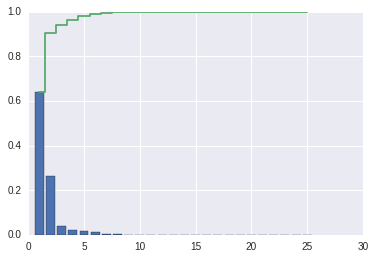

In [36]:
var = pca.explained_variance_
cmap = sns.color_palette()
# plt.figure(figsize=(150, 100))
plt.bar(np.arange(1, len(var)+1), var/np.sum(var), align="center", color=cmap[0])
plt.step(np.arange(1, len(var)+1), np.cumsum(var)/np.sum(var), where="mid", color=cmap[1])

plt.show()

In [37]:
def labeling_league(x):
    if x == "Bundesliga":
        x = 0
        
    if x == "Ligue1":
        x = 1
        
    if x == "SerieA":
        x = 2
        
    if x == "PremierLeague":
        x = 3
        
    if x == "LaLiga":
        x = 4
        
    if x == "Eredivisie":
        x = 5
        
    return x

In [38]:
forward_df['labeled_league'] = forward_df['league'].apply(lambda x: labeling_league(x))

In [39]:
modeling_data = merged_player[merged_player['rating'] >= 7]

In [40]:
modeling_data0 = modeling_data.drop(['flag', 'full_time', 'half_time', 'player_number', 'ps_y', 'rating', 'team_name'], axis=1)

In [41]:
modeling_data0['labeled_league'] = modeling_data0['league'].apply(lambda x: labeling_league(x))

In [42]:
modeling_data0 = modeling_data0.drop(['position', 'league'], axis=1)

In [43]:
modeling_data0.columns[:-1]

Index(['age', 'asists', 'avgp', 'aw', 'blocks', 'clear', 'crosses', 'disp',
       'drb', 'fouled', 'fouls', 'goals', 'inter', 'keyp', 'longb', 'mins',
       'motm', 'name', 'off', 'offsides', 'owng', 'ps_x', 'red', 'spg',
       'tackles', 'tall', 'thrb', 'unstch', 'weight', 'yel'],
      dtype='object')

In [45]:
X = modeling_data0[:-1].get_values()

In [46]:
y = modeling_data0["labeled_league"].get_values()

## LCY

#### 리그 추천

In [ ]:
forward_df0 = forward_df0.drop(['team_name'], axis=1)

In [131]:
forward_df0 = forward_df0.drop(['labeled_league'], axis=1)

In [124]:
forward_df0 = forward_df0.fillna(0)

In [217]:
# 로지스틱회귀분석 모델링구축

from sklearn import linear_model, decomposition
from sklearn.pipeline import Pipeline

X = forward_df0.get_values()
y = forward_df['labeled_league'].get_values()

model1 = linear_model.LogisticRegression()
model1.fit(X, y)

pca = decomposition.PCA(n_components=7)
logistic = linear_model.LogisticRegression()
model2 = Pipeline(steps=[('pca', pca), ('logistic', logistic)])
model2.fit(X, y)

Pipeline(steps=[('pca', PCA(copy=True, n_components=7, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [136]:
model2.predict(X_LCY)

array([3])

In [137]:
model2.predict_proba(X_LCY)

array([[ 0.11345137,  0.17037199,  0.17423785,  0.27230818,  0.13018545,
         0.13944517]])

In [143]:
# 프리미어리그 평균특성
pca.transform(premier_for_df1.mean())

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[-1.13751491, -2.82622456,  0.47527982,  0.2156875 ,  0.10109106,
        -0.63552026,  0.77276771]])

In [135]:
# 이청용 특성 그래프
pca.transform(X_LCY)

array([[ -3.07237123, -18.67006642,  -0.31044756,   3.91214683,
         -1.22799937,  -2.33972856,   1.84911615]])

#### 팀 추천

In [49]:
len(forward_df0.columns)

25

In [50]:
merged_player0.columns

Index(['age', 'asists', 'avgp', 'aw', 'blocks', 'clear', 'crosses', 'disp',
       'drb', 'fouled', 'fouls', 'goals', 'inter', 'keyp', 'league', 'longb',
       'mins', 'off', 'offsides', 'owng', 'position', 'ps_x', 'ps_y', 'red',
       'spg', 'tackles', 'tall', 'thrb', 'unstch', 'weight', 'yel'],
      dtype='object')

In [51]:
merged_player0 = merged_player.drop(['flag', 'full_time', 'half_time', 'player_number', 'ps_y', 'rating', 'team_name'], axis=1)

In [52]:
LCY = merged_player0[merged_player0['name'] == "Lee Chung-yong"]

In [53]:
LCY.columns

Index(['age', 'asists', 'avgp', 'aw', 'blocks', 'clear', 'crosses', 'disp',
       'drb', 'fouled', 'fouls', 'goals', 'inter', 'keyp', 'league', 'longb',
       'mins', 'motm', 'name', 'off', 'offsides', 'owng', 'position', 'ps_x',
       'red', 'spg', 'tackles', 'tall', 'thrb', 'unstch', 'weight', 'yel'],
      dtype='object')

In [54]:
LCY0 = LCY.drop(['position', 'motm', 'mins', 'name', 'league'], axis=1)

In [55]:
LCY0 = LCY0.drop(['off', 'offsides'], axis=1)

In [56]:
# 이청용 선수
# 리그 추천결과 / 팀 추천결과
# Plot 6개의 변수 비교
# 인사이트 도출

In [57]:
X_LCY = LCY0.get_values()

In [58]:
modeling_data0.columns

Index(['age', 'asists', 'avgp', 'aw', 'blocks', 'clear', 'crosses', 'disp',
       'drb', 'fouled', 'fouls', 'goals', 'inter', 'keyp', 'longb', 'mins',
       'motm', 'name', 'off', 'offsides', 'owng', 'ps_x', 'red', 'spg',
       'tackles', 'tall', 'thrb', 'unstch', 'weight', 'yel', 'labeled_league'],
      dtype='object')

In [59]:
LCY0.columns, forward_df0.columns

(Index(['age', 'asists', 'avgp', 'aw', 'blocks', 'clear', 'crosses', 'disp',
        'drb', 'fouled', 'fouls', 'goals', 'inter', 'keyp', 'longb', 'owng',
        'ps_x', 'red', 'spg', 'tackles', 'tall', 'thrb', 'unstch', 'weight',
        'yel'],
       dtype='object'),
 Index(['age', 'asists', 'avgp', 'aw', 'blocks', 'clear', 'crosses', 'disp',
        'drb', 'fouled', 'fouls', 'goals', 'inter', 'keyp', 'longb', 'owng',
        'ps_x', 'red', 'spg', 'tackles', 'tall', 'thrb', 'unstch', 'weight',
        'yel'],
       dtype='object'))

In [60]:
model1.predict(X_LCY) 

array([3])

In [61]:
model1.predict_proba(X_LCY) # 프리미어리그 / 라리가 / 리그1 / 에레디비지 / 분데스리가 / 세리에 순

array([[ 0.06724199,  0.19844221,  0.04051108,  0.35338146,  0.20758871,
         0.13283455]])

### 그리즈만

In [220]:
pca.transform(X_Griezmann0.get_values())

array([[  2.04342526,  -8.29242194,  -4.2728355 , -17.59585551,
          0.61397107,   3.42117533,   2.28055522]])

In [221]:
model2.predict(X_Griezmann0.get_values())

array([4])

In [222]:
model2.predict_proba(X_Griezmann0.get_values())

array([[ 0.07598892,  0.14759883,  0.12872037,  0.15999702,  0.24628519,
         0.24140966]])

In [62]:
# 팀 추천 모델

In [63]:
forward_df0 = forward_df.drop(['flag', 'full_time', 'half_time', 'league', 'mins', 'motm', 'name', 'off', 'offsides', 'player_number', 'position', 'ps_y', 'rating'], axis=1)

In [64]:
premier_for_df = forward_df0[forward_df0['labeled_league'] == 3]

In [65]:
# premier_for_df['team_name'].

In [66]:
def labeling_team(x):
    if x == 'Everton':
        x = 0
    
    if x == 'Southampton':
        x = 1
        
    if x == 'Liverpool':
        x = 2
        
    if x == 'Arsenal':
        x = 3   
    
    if x == 'Norwich':
        x = 4
        
    if x == 'Stoke':
        x = 5
        
    if x == 'West Bromwich Albion':
        x = 6
        
    if x == 'Leicester':
        x = 7
        
    if x == 'Bournemouth':
        x = 8
        
    if x == 'Tottenham':
        x = 9
        
    if x == 'Watford':
        x = 10
        
    if x == 'Crystal Palace':
        x = 11
        
    if x == 'Sunderland':
        x = 12
        
    if x == 'Manchester City':
        x = 13
        
    if x == 'West Ham':
        x = 14
        
    if x == 'Manchester United':
        x = 15
        
    if x == 'Newcastle United':
        x = 16   
    
    if x == 'Aston Villa':
        x = 17
        
    if x == 'Swansea':
        x = 18
        
    return x

In [67]:
premier_for_df['labeled_team'] = premier_for_df['team_name'].apply(lambda x: labeling_team(x))

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [68]:
premier_for_df0 = premier_for_df.drop(['team_name'], axis=1)

In [69]:
premier_for_df0.columns[:-2]

Index(['age', 'asists', 'avgp', 'aw', 'blocks', 'clear', 'crosses', 'disp',
       'drb', 'fouled', 'fouls', 'goals', 'inter', 'keyp', 'longb', 'owng',
       'ps_x', 'red', 'spg', 'tackles', 'tall', 'thrb', 'unstch', 'weight',
       'yel'],
      dtype='object')

In [70]:
premier_for_df.to_csv('./hhhhh.csv')

In [71]:
np.shape(X)

(920, 25)

In [72]:
np.shape(y)

(920,)

In [73]:
y[:-2]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3,

In [74]:
X

array([[ 31. ,   4. ,   0.8, ...,   2.2,  82. ,   5. ],
       [ 27. ,   1. ,   0.3, ...,   0.7,  83. ,   1. ],
       [ 27. ,   2. ,   0.6, ...,   0.8,  78. ,   0. ],
       ..., 
       [ 27. ,   5. ,   1.4, ...,   1.4,  74. ,   1. ],
       [ 23. ,   2. ,   1.1, ...,   2.7,  70. ,   3. ],
       [ 23. ,  10. ,   2.8, ...,   3.1,  70. ,   6. ]])

In [75]:
premier_for_df0.columns

Index(['age', 'asists', 'avgp', 'aw', 'blocks', 'clear', 'crosses', 'disp',
       'drb', 'fouled', 'fouls', 'goals', 'inter', 'keyp', 'longb', 'owng',
       'ps_x', 'red', 'spg', 'tackles', 'tall', 'thrb', 'unstch', 'weight',
       'yel', 'labeled_league', 'labeled_team'],
      dtype='object')

In [76]:
premier_for_df1 = premier_for_df0.drop(['labeled_league', 'labeled_team'], axis=1)

In [225]:
from sklearn import linear_model, decomposition
from sklearn.pipeline import Pipeline

X = premier_for_df1.get_values()
y = premier_for_df0['labeled_team'].get_values()

model1 = linear_model.LogisticRegression()
model1.fit(X, y)

pca = decomposition.PCA(n_components=7, whiten=True)
logistic = linear_model.LogisticRegression()
model2 = Pipeline(steps=[('pca', pca), ('logistic', logistic)])
model2.fit(X, y)

Pipeline(steps=[('pca', PCA(copy=True, n_components=7, whiten=True)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [146]:
model2.predict(X_LCY)

array([8])

In [147]:
model2.predict_proba(X_LCY) * 250 # 본머스 / 헐시티 / 웨스트 브롬위치 / 레스터시티 / 미들즈브러 / 크리스탈팰리스

array([[  9.52140732,   9.85047104,  15.86186891,   8.37328663,
         23.84386295,  13.33549314,  14.78230279,  10.03077457,
         27.2733936 ,  10.15090235,   7.655245  ,  20.62484062,
          9.28222635,   8.39776017,  10.15279065,  10.0765358 ,
         15.90139656,   9.89271039,  14.99273114]])

In [80]:
model2.predict(X_LCY)

array([8])

In [154]:
pca.transform(X_LCY)

array([[ 0.04499639,  0.89395284, -0.09651582,  0.63559118,  0.40924805,
         0.45267125, -0.29882842]])

In [151]:
pca.transform(premier_for_df1.get_values())[8]

array([ 0.51725429, -0.79889696,  1.32282813,  0.32769386,  0.39227483,
       -0.18912829,  0.29580999])

In [148]:
pca.explained_variance_ratio_

array([ 0.57787614,  0.32002354,  0.05397902,  0.02711218,  0.0118585 ,
        0.00418159,  0.00192744])

In [152]:
pca.explained_variance_

array([ 585.53994648,  324.26770246,   54.69489039,   27.47173965,
         12.01576587,    4.23704323,    1.95300254])

In [83]:
premier_for_df2 = premier_for_df0.drop(['labeled_league'], axis=1)

In [84]:
본머스 = premier_for_df2[premier_for_df2['labeled_team'] == 8].mean()

In [85]:
pca.transform(본머스.get_values()[:-1])

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.03933851,  0.24257485,  0.01694371,  0.28553601,  0.31837268,
         0.07447093]])

In [86]:
pca.transform(X_LCY)

array([[ 0.04499639,  0.89395284, -0.09651582,  0.63559118,  0.40924805,
         0.45267125]])

In [87]:
model2.transform(X_LCY)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 0.89395284,  0.63559118,  0.40924805]])

In [88]:
model2.predict(X_LCY)

array([8])

In [89]:
model2.predict_proba(X_LCY).max()

0.10978711506367606

In [226]:
# 그리즈만
pca.transform(X_Griezmann0.get_values())

array([[-0.13840522,  0.27877755,  0.27898698, -3.58951927, -0.27683213,
         1.0369646 ,  0.35023899]])

In [227]:
pca.explained_variance_

array([ 585.53994648,  324.26770246,   54.69489039,   27.47173965,
         12.01576587,    4.23704323,    1.95300254])

In [228]:
pca.explained_variance_ratio_

array([ 0.57787614,  0.32002354,  0.05397902,  0.02711218,  0.0118585 ,
        0.00418159,  0.00192744])

In [229]:
model2.predict_proba(X_Griezmann0.get_values())

array([[ 0.04706087,  0.06028754,  0.06413098,  0.05651783,  0.01476913,
         0.04501621,  0.01704501,  0.1137762 ,  0.02942572,  0.10682589,
         0.05529862,  0.00843136,  0.0475504 ,  0.16775164,  0.04649432,
         0.05675704,  0.02559763,  0.02123423,  0.01602939]])

In [234]:
model2.predict_proba(X_Griezmann0.get_values()).argsort()

array([[11,  4, 18,  6, 17, 16,  8,  5, 14,  0, 12, 10,  3, 15,  1,  2,  9,
         7, 13]])

In [230]:
model2.predict(X_Griezmann0.get_values())

array([13])

In [233]:
pca.transform(premier_for_df1)[13]

array([ 0.65618841, -0.6164798 ,  1.0500869 , -0.79651177, -0.48773168,
        0.79874458, -0.17414369])

In [178]:
# 박주호 선수
X_PJH = defense_df[defense_df['name'] == 'Joo-Ho Park']

In [179]:
drop_column_list = ['flag', 'full_time', 'half_time', 'mins', 'motm', 'name', 'player_number', 'ps_y', 'rating']

In [180]:
defense_df0 = defense_df.drop(drop_column_list, axis=1)

In [181]:
X_PJH = X_PJH.drop(drop_column_list, axis=1)

In [182]:
defense_df0['labeled_league'] = defense_df0['league'].apply(lambda x: labeling_league(x))

In [183]:
defense_df0['labeled_league'].unique()

array([0, 1, 2, 3, 4, 5])

In [184]:
defense_df0.columns

Index(['age', 'asists', 'avgp', 'aw', 'blocks', 'clear', 'crosses', 'disp',
       'drb', 'fouled', 'fouls', 'goals', 'inter', 'keyp', 'league', 'longb',
       'off', 'offsides', 'owng', 'position', 'ps_x', 'red', 'spg', 'tackles',
       'tall', 'team_name', 'thrb', 'unstch', 'weight', 'yel',
       'labeled_league'],
      dtype='object')

In [185]:
defense_df1 = defense_df0.drop(['position', 'league', 'labeled_league', 'team_name'], axis=1)

In [186]:
defense_df1 = defense_df1.fillna(0)

In [187]:
X = defense_df1.get_values()
y = defense_df0['labeled_league'].get_values()

model1 = linear_model.LogisticRegression()
model1.fit(X, y)

pca = decomposition.PCA(n_components=7, whiten=True)
logistic = linear_model.LogisticRegression()
model2 = Pipeline(steps=[('pca', pca), ('logistic', logistic)])
model2.fit(X, y)

Pipeline(steps=[('pca', PCA(copy=True, n_components=7, whiten=True)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [188]:
# 박주호 리그 추천결과
X_PJH = X_PJH.drop(['team_name', 'position', 'league'], axis=1)

In [189]:
X_PJH = X_PJH.mean().get_values()

In [190]:
model1.predict(X_PJH)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

In [191]:
model1.predict_proba(X_PJH) # 리그앙 / 라리가 / 세리에 / 에레디비지 / 프리미어리그 / 분데스리가

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.02245917,  0.45155993,  0.17482921,  0.02720223,  0.28335714,
         0.04059232]])

In [194]:
pca.explained_variance_

array([ 545.70667636,  230.05587279,   42.91591661,   26.15573038,
         15.74688547,    9.01318203,    4.01945215])

In [195]:
pca.explained_variance_ratio_

array([ 0.61938826,  0.26111813,  0.04871044,  0.02968729,  0.01787304,
        0.01023015,  0.00456216])

In [192]:
pca.transform(X_PJH)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[-0.22759147, -1.01539324,  0.55405545,  0.34521017, -0.57329276,
         1.26220434, -0.27817223]])

In [200]:
pca.transform(ligue1_def_df0.mean())

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[-0.00384051, -0.17893377,  0.04428455, -0.02785401, -0.0224852 ,
         0.02342329, -0.09652428]])

In [104]:
# 박주호 팀 추천결과

ligue1_def_df = defense_df0[defense_df0['labeled_league'] == 1]

In [105]:
ligue1_def_df['team_name'].unique()

array(['Reims', 'Lille', 'Toulouse', 'GFC Ajaccio', 'Paris Saint Germain',
       'Saint-Etienne', 'SC Bastia', 'Rennes', 'Guingamp', 'Angers',
       'Monaco', 'Lyon', 'Montpellier', 'Caen', 'Nantes', 'Nice',
       'Lorient', 'Marseille', 'Bordeaux'], dtype=object)

In [106]:
def labeling_team(x):
    if x == 'Reims':
        x = 0
    
    if x == 'Lille':
        x = 1
        
    if x == 'Toulouse':
        x = 2
        
    if x == 'GFC Ajaccio':
        x = 3   
    
    if x == 'Paris Saint Germain':
        x = 4
        
    if x == 'Saint-Etienne':
        x = 5
        
    if x == 'SC Bastia':
        x = 6
        
    if x == 'Rennes':
        x = 7
        
    if x == 'Guingamp':
        x = 8
        
    if x == 'Angers':
        x = 9
        
    if x == 'Monaco':
        x = 10
        
    if x == 'Lyon':
        x = 11
        
    if x == 'Montpellier':
        x = 12
        
    if x == 'Caen':
        x = 13
        
    if x == 'Nantes':
        x = 14
        
    if x == 'Nice':
        x = 15
        
    if x == 'Lorient':
        x = 16   
    
    if x == 'Marseille':
        x = 17
        
    if x == 'Bordeaux':
        x = 18
        
    return x

In [107]:
defense_df0.columns

Index(['age', 'asists', 'avgp', 'aw', 'blocks', 'clear', 'crosses', 'disp',
       'drb', 'fouled', 'fouls', 'goals', 'inter', 'keyp', 'league', 'longb',
       'off', 'offsides', 'owng', 'position', 'ps_x', 'red', 'spg', 'tackles',
       'tall', 'team_name', 'thrb', 'unstch', 'weight', 'yel',
       'labeled_league'],
      dtype='object')

In [108]:
ligue1_def_df['labeled_team'] = ligue1_def_df['team_name'].apply(lambda x: labeling_team(x))

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [109]:
ligue1_def_df['labeled_team'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [110]:
ligue1_def_df.columns

Index(['age', 'asists', 'avgp', 'aw', 'blocks', 'clear', 'crosses', 'disp',
       'drb', 'fouled', 'fouls', 'goals', 'inter', 'keyp', 'league', 'longb',
       'off', 'offsides', 'owng', 'position', 'ps_x', 'red', 'spg', 'tackles',
       'tall', 'team_name', 'thrb', 'unstch', 'weight', 'yel',
       'labeled_league', 'labeled_team'],
      dtype='object')

In [111]:
ligue1_def_df0 = ligue1_def_df.drop(['team_name', 'labeled_league', 'labeled_team', 'position', 'league'], axis=1)

In [201]:
X = ligue1_def_df0.get_values()
y = ligue1_def_df['labeled_team'].get_values()

model1 = linear_model.LogisticRegression()
model1.fit(X, y)

pca = decomposition.PCA(n_components=7, whiten=True)
logistic = linear_model.LogisticRegression()
model2 = Pipeline(steps=[('pca', pca), ('logistic', logistic)])
model2.fit(X, y)

Pipeline(steps=[('pca', PCA(copy=True, n_components=7, whiten=True)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [205]:
team_list = ligue1_def_df['team_name'].unique()

In [206]:
team_list[model2.predict_proba(X_PJH).argsort()]

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([['GFC Ajaccio', 'Toulouse', 'SC Bastia', 'Nice', 'Monaco', 'Lille',
        'Montpellier', 'Guingamp', 'Bordeaux', 'Reims', 'Angers', 'Caen',
        'Nantes', 'Saint-Etienne', 'Marseille', 'Rennes', 'Lorient',
        'Lyon', 'Paris Saint Germain']], dtype=object)

In [204]:
model2.predict(X_PJH)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([4])

In [210]:
pca.explained_variance_

array([ 415.84621301,  146.80814954,   40.35658766,   18.70500326,
          9.00170695,    3.23495578,    1.71493328])

In [211]:
pca.explained_variance_ratio_

array([ 0.64895985,  0.22910536,  0.06297954,  0.02919059,  0.01404785,
        0.0050484 ,  0.00267628])

In [207]:
pca.transform(X_PJH)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[-0.23760984,  1.07859318, -0.44990891, -0.62543178, -1.12187084,
         0.43388126,  0.03093633]])

In [208]:
pca.transform(ligue1_def_df0)[4]

array([ 0.41843115,  0.07804879,  0.6893985 , -1.92770647, -1.48420352,
       -0.54139031,  0.08455022])

In [209]:
model2.predict_proba(X_PJH)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.03961097,  0.03328817,  0.01462148,  0.01129092,  0.17705082,
         0.05910371,  0.01948986,  0.07250312,  0.03765622,  0.04137327,
         0.02658805,  0.13223591,  0.03368584,  0.04174655,  0.04708741,
         0.0220906 ,  0.08526633,  0.0671904 ,  0.03812038]])

In [212]:
# 앙투앙 그리즈만
from sklearn import linear_model, decomposition
from sklearn.pipeline import Pipeline

X = forward_df1.get_values()
y = forward_df0['labeled_league'].get_values()

model1 = linear_model.LogisticRegression()
model1.fit(X, y)

NameError: name 'forward_df1' is not defined

In [ ]:
forward_df1 = forward_df0.drop(['team_name', 'labeled_league'], axis=1)

In [ ]:
forward_df1.columns

In [ ]:
forward_df1 = forward_df1.fillna(0)

In [213]:
X_Griezmann = forward_df[forward_df['name'] == 'Antoine Griezmann']

In [214]:
X_Griezmann0 = X_Griezmann.drop(['flag', 'full_time', 'rating','half_time', 'league', 'mins', 'motm', 'off', 'offsides', 'player_number', 'ps_y', 'team_name', 'labeled_league'], axis=1)

In [215]:
X_Griezmann0 = X_Griezmann0.drop(['position', 'name'], axis=1)

In [216]:
model1.predict(X_Griezmann0)

ValueError: X has 25 features per sample; expecting 27

In [ ]:
model1.predict_proba(X_Griezmann0)

In [ ]:
model1.predict_proba(X_Griezmann0).argsort() # 라리가 / 에레디비지 / 프리미어 / 분데스 / 리그앙 / 세리에

In [ ]:
X = premier_for_df1.get_values()
y = premier_for_df0['labeled_team'].get_values()

model1 = linear_model.LogisticRegression()
model1.fit(X, y)

In [ ]:
model1.predict(X_Griezmann0)

In [ ]:
model1.predict_proba(X_Griezmann0)

In [ ]:
premier_for_df['team_name'].unique()[[7, 9, 5, 10, 0, 13, 12, 15]]

In [ ]:
model1.predict_proba(X_Griezmann0).argsort()